In [ ]:
# 下載 myfun.py
!wget "https://raw.githubusercontent.com/TA-aiacademy/course_3.0/ML/02_ML/part4/Chapter5/myfun.py"

--2023-07-29 07:48:13--  https://raw.githubusercontent.com/TA-aiacademy/course_3.0/ML/02_ML/part4/Chapter5/myfun.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4259 (4.2K) [text/plain]
Saving to: ‘myfun.py’

myfun.py            100%[===================>]   4.16K  --.-KB/s    in 0s      

2023-07-29 07:48:13 (85.8 MB/s) - ‘myfun.py’ saved [4259/4259]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from matplotlib.pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = (10, 5)

In [ ]:
from myfun import plot_decision_regions


def svm_example(plot_dict, kernel):
    # import some data to play with
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # we only take the first two features.
    y = iris.target

    # data since we want to plot the support vectors
    C = 1
    # Plot the decision boundary. For that, we will assign a color to each
    for other_params in plot_dict:
        models = svm.SVC(kernel=kernel,
                         C=C,
                         degree=other_params,
                         gamma=1 if kernel == 'poly' else other_params)
        models.fit(X, y)
        accuracy = models.score(X, y)
        # prediction = models.predict(y)
        plt.subplot(plot_dict[other_params])
        plt.tight_layout()
        # plt.figure()
        plot_decision_regions(X, y, models)
        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        if kernel == 'poly':
            plt.title('Plot for degree=%.2f' % other_params + '\n' +
                      'Accuracy:%.2f' % accuracy)
        if kernel == 'rbf':
            plt.title('Plot for gamma=%.2f' % other_params + '\n' +
                      'Accuracy:%.2f' % accuracy)

# Degree in Polynominal Kernel

* 在scikit-learn中kernel定義文件： [kernel func](https://scikit-learn.org/dev/modules/svm.html#kernel-functions)
* 補充討論： [poly中使用gamma](https://stackoverflow.com/questions/12227881/scikit-learn-poly-kernel-and-gamma-value)

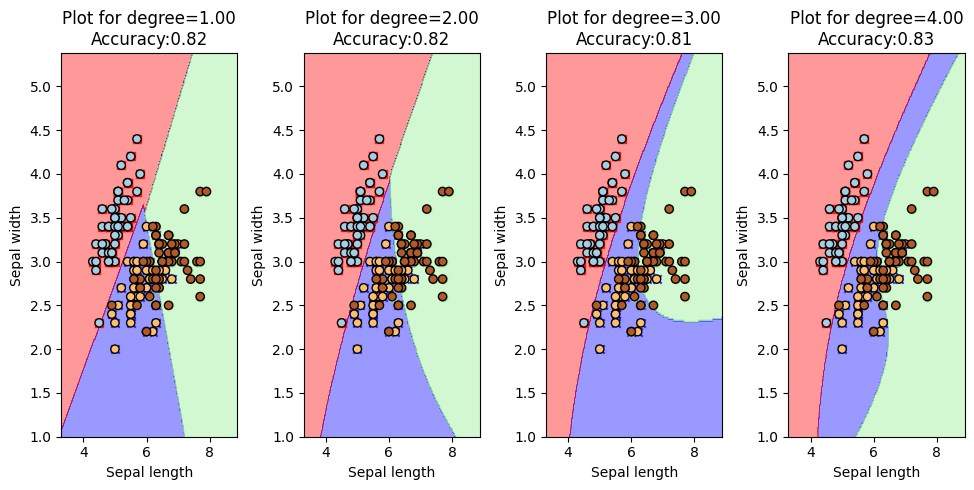

In [ ]:
plot_dict = {1: 141, 2: 142, 3: 143, 4: 144}
svm_example(plot_dict, kernel='poly')

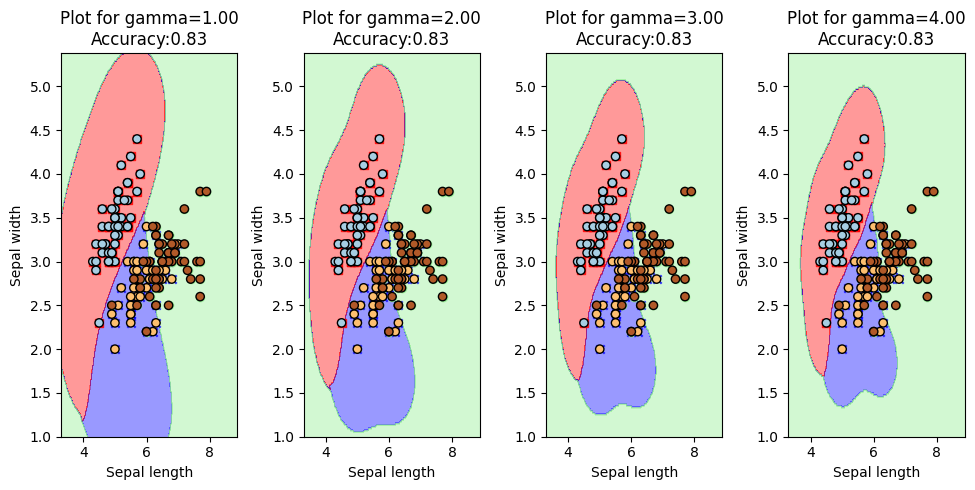

In [ ]:
plot_dict = {1: 141, 2: 142, 3: 143, 4: 144}
svm_example(plot_dict, kernel='rbf')